> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [4]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [29]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [32]:
shape =df.shape
print('This data contains {} row and {} columns.'.format(shape[0],shape[1]))

This data contains 10866 row and 21 columns.


In [33]:
#print the columns names
for i,col in enumerate(df.columns):
    print(i,col)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [34]:
#get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [35]:
#check for duplicated
dup=df.duplicated().sum()
print('There is {} dubplicated rows in this data'.format(dup))

There is 1 dubplicated rows in this data


In [36]:
#delete dublicated
df.drop_duplicates(inplace=True)

In [37]:
#delete the useless columns
del_col = [ 'id', 'imdb_id','budget_adj', 'revenue_adj','tagline', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']
df.drop(del_col,axis = 1,inplace=True)

In [38]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2015


In [39]:
#replace the 0 in 'revenue','budget','runtime' columns by NAN cause it impossible to be 0
df[['revenue','budget','runtime']]=df[['revenue','budget','runtime']].replace(0,np.NAN)

In [40]:
#check for null values
df.isnull().sum()

popularity           0
budget            5696
revenue           6016
original_title       0
cast                76
director            44
runtime             31
genres              23
release_date         0
release_year         0
dtype: int64

In [41]:
#drop all NAN values
df.dropna(inplace = True)

In [42]:
shape =df.shape
print('The new data contains {} row and {} columns.'.format(shape[0],shape[1]))

The new data contains 3849 row and 10 columns.


In [43]:
dup=df.duplicated().sum()
print('The new data contains 0 null and {} duplicated.'.format(dup))

The new data contains 0 null and 0 duplicated.


In [44]:
#print the new columns names
for i,col in enumerate(df.columns):
    print(i,col)

0 popularity
1 budget
2 revenue
3 original_title
4 cast
5 director
6 runtime
7 genres
8 release_date
9 release_year


In [45]:
#display columns types
df.dtypes

popularity        float64
budget            float64
revenue           float64
original_title     object
cast               object
director           object
runtime           float64
genres             object
release_date       object
release_year        int64
dtype: object

In [46]:
# convert 'release_date' columns to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [47]:
#display the new columns types
df.dtypes

popularity               float64
budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
runtime                  float64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

In [48]:
#make a new columns for profit which is revenue-budget
df['profit'] = df['revenue'] - df['budget']

In [49]:
#first 10 row of the new data
df.head(10)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,release_year,profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,2.284364e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2015,1.852382e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.868178e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2015,1.316249e+09
5,9.110700,135000000.0,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156.0,Western|Drama|Adventure|Thriller,2015-12-25,2015,3.979505e+08
6,8.654359,155000000.0,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125.0,Science Fiction|Action|Thriller|Adventure,2015-06-23,2015,2.856035e+08
7,7.667400,108000000.0,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141.0,Drama|Adventure|Science Fiction,2015-09-30,2015,4.873803e+08
8,7.404165,74000000.0,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91.0,Family|Animation|Adventure|Comedy,2015-06-17,2015,1.082731e+09
9,6.326804,175000000.0,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94.0,Comedy|Animation|Family,2015-06-09,2015,6.787086e+08


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which genres are most popular ? )

In [50]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
def extract_data(column_name):
    #will take a column, and separate the string by '|'
    all_data = df[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    
    #this will us value in descending order
    count = all_data.value_counts(ascending = False)
    
    return count
gener_count = extract_data('genres')
gener_count

Drama              1753
Comedy             1357
Thriller           1203
Action             1085
Adventure           749
Romance             666
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               134
History             129
War                 119
Western              52
Documentary          31
Foreign              12
TV Movie              1
dtype: int64

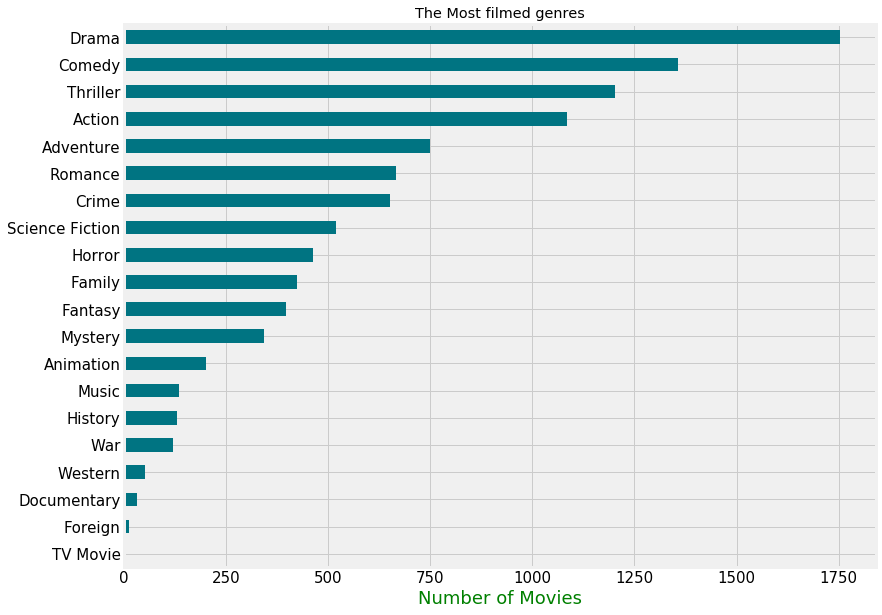

In [51]:
gener_count.sort_values(ascending = True, inplace = True)

#initializing plot
ax = gener_count.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'The Most filmed genres')

#x-label
ax.set_xlabel('Number of Movies', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

### THE Graph show that Drama ,Comedy,Thriller,Action ,Adventure and Romance are the most popular geners
### And   War ,Western  ,Documentary,Foreign and TV Movie are the less popular geners
 
          
           
             

### Research Question 2  (In which year we had the most movies making profits?)

In [52]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
def max_year_profit():
    return df.groupby('release_year')['profit'].sum()
profits_each_year = max_year_profit()
profits_each_year

release_year
1960    1.081981e+08
1961    2.990832e+08
1962    1.668798e+08
1963    1.154119e+08
1964    2.946784e+08
1965    3.992819e+08
1966    5.246869e+07
1967    6.363346e+08
1968    1.682718e+08
1969    2.068630e+08
1970    4.540700e+08
1971    3.362847e+08
1972    4.572359e+08
1973    1.057686e+09
1974    6.505820e+08
1975    8.082073e+08
1976    6.294265e+08
1977    1.743308e+09
1978    1.005100e+09
1979    9.503302e+08
1980    1.002066e+09
1981    1.320251e+09
1982    1.811756e+09
1983    1.505074e+09
1984    1.833438e+09
1985    1.666899e+09
1986    1.665355e+09
1987    2.148547e+09
1988    2.314987e+09
1989    3.603941e+09
1990    3.454905e+09
1991    3.048121e+09
1992    3.873046e+09
1993    4.575828e+09
1994    4.704384e+09
1995    5.608098e+09
1996    4.736627e+09
1997    6.380241e+09
1998    5.274145e+09
1999    6.433209e+09
2000    6.110775e+09
2001    8.022045e+09
2002    9.007576e+09
2003    9.202155e+09
2004    9.822507e+09
2005    9.259453e+09
2006    8.726300e+09


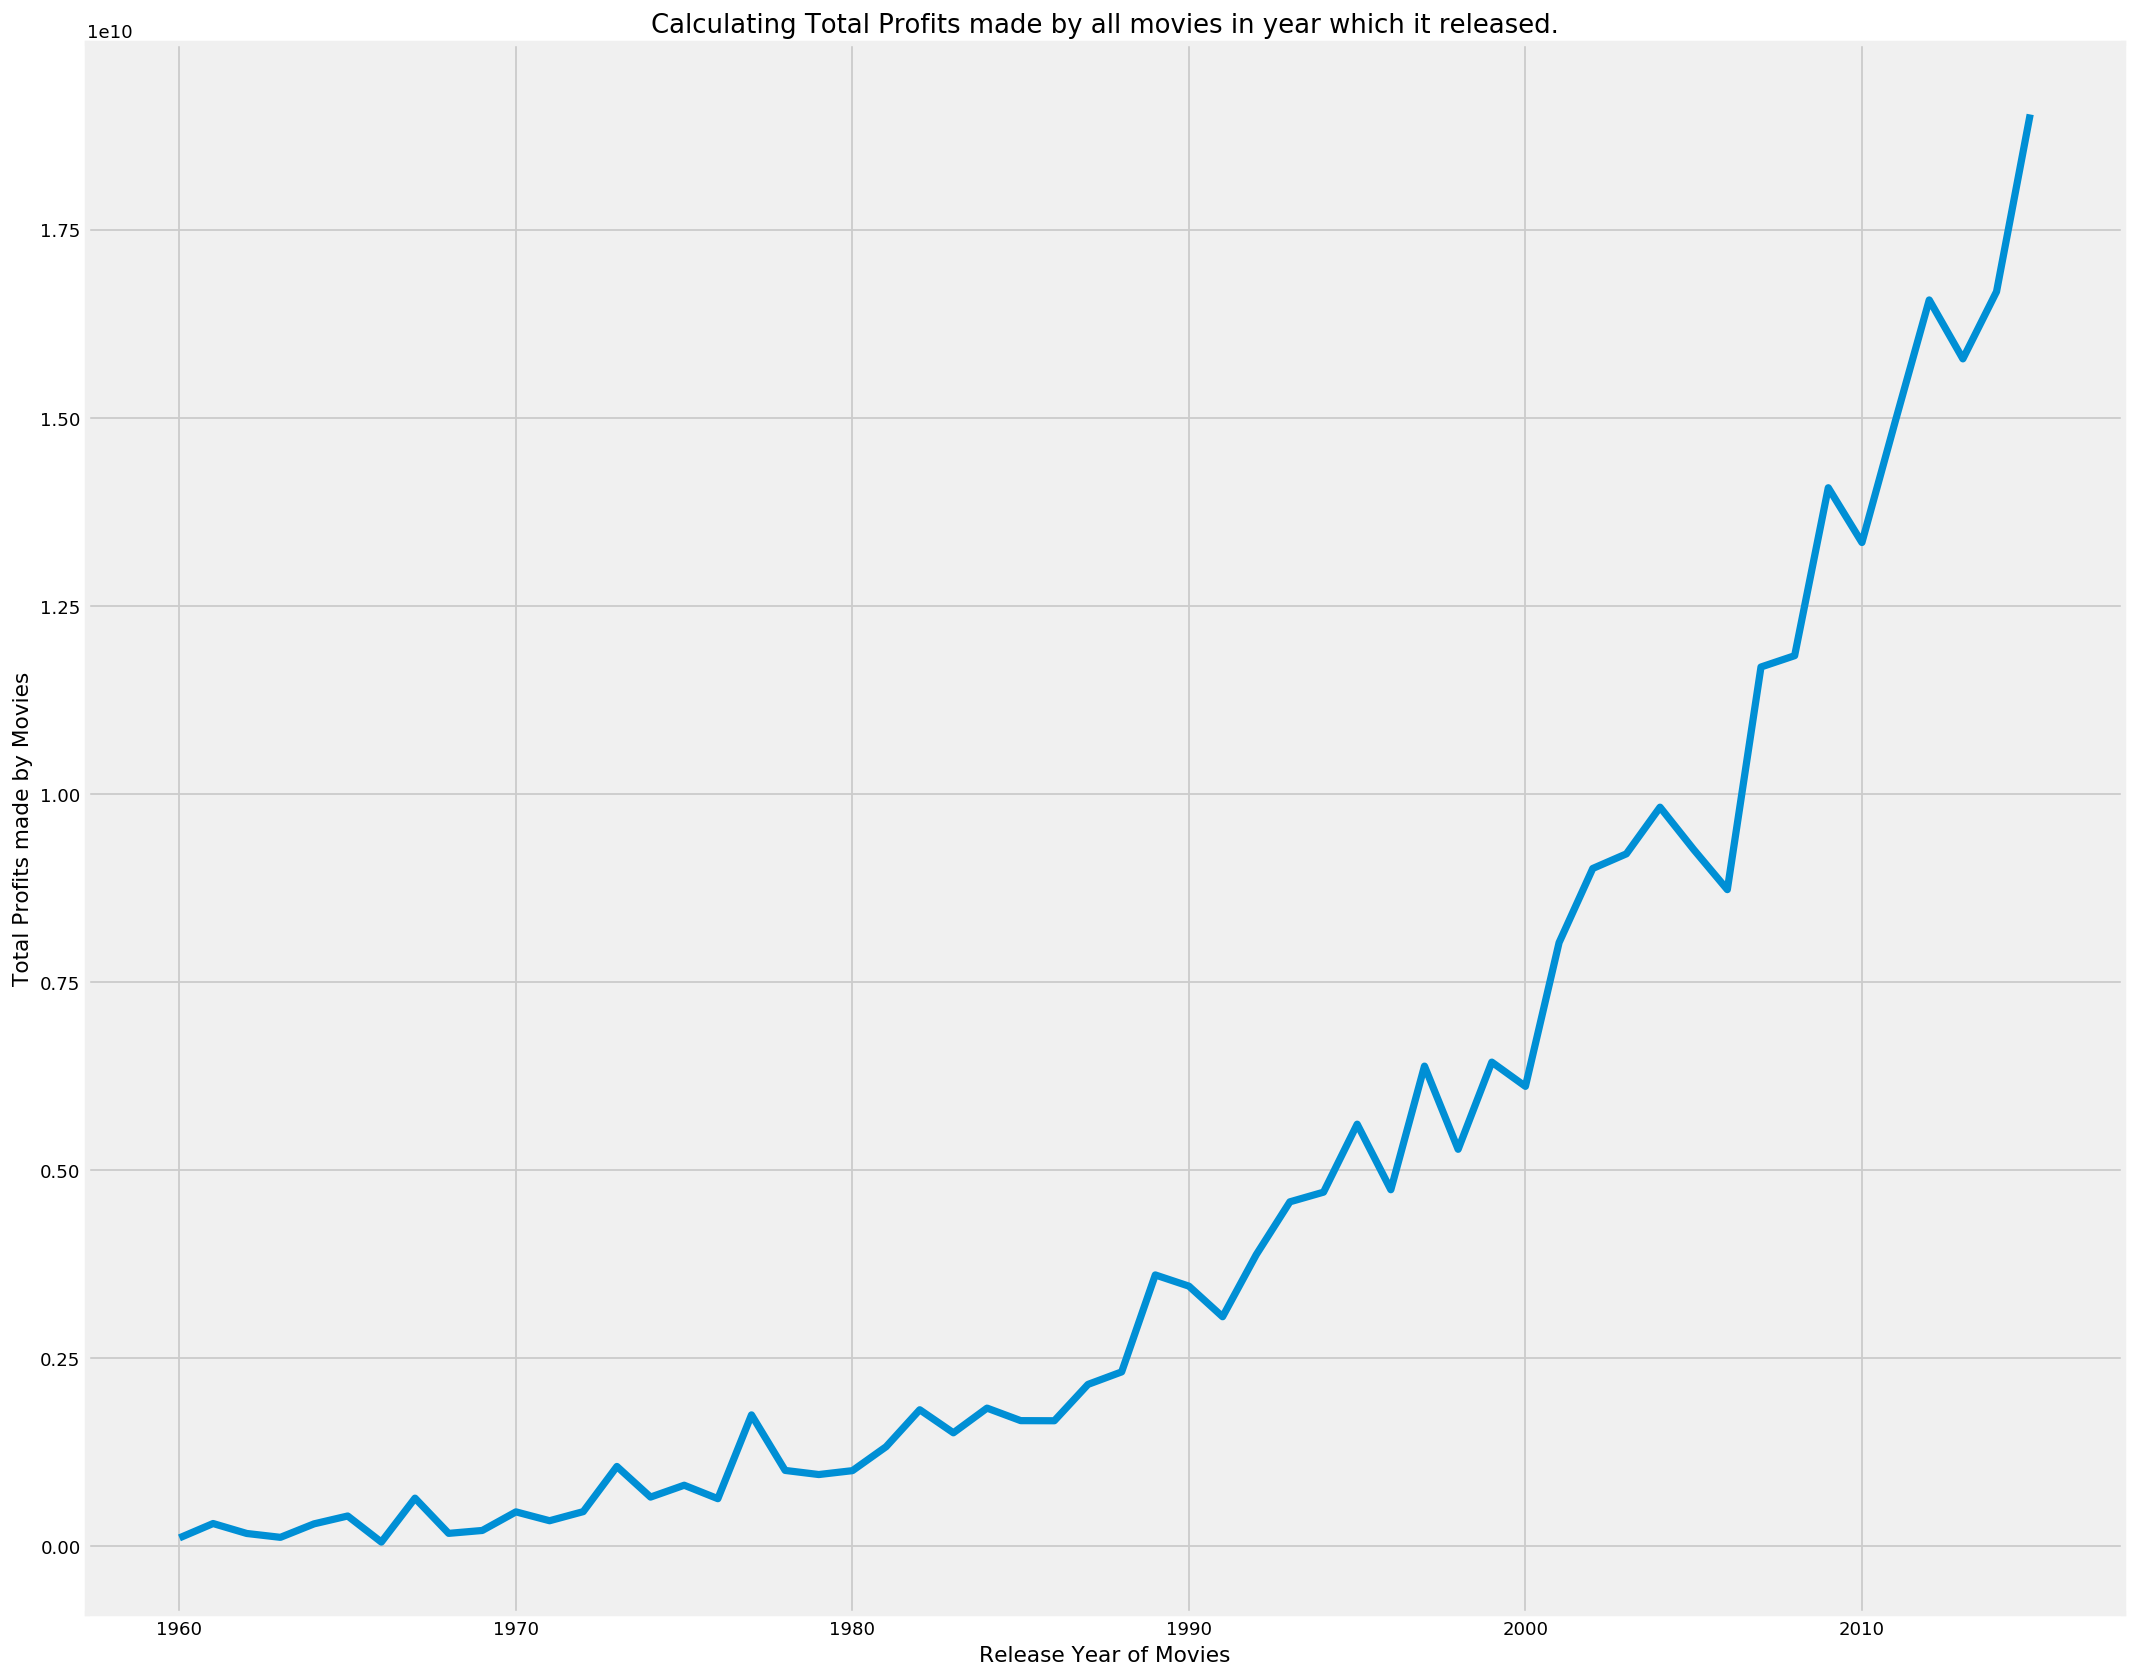

In [53]:
#Line plot used for this
#Since we want to know the profits of movies for every year we need to group all the movies for those years

#the groupby function below collects all the movies for that year and then the profits of all those movies for that years is been added
#and storing all this in variable
profits_each_year = df.groupby('release_year')['profit'].sum()

#giving the figure size(width, height)
plt.figure(figsize=(18,16), dpi = 130)

#labeling x-axis
plt.xlabel('Release Year of Movies', fontsize = 12)
#labeling y-axis
plt.ylabel('Total Profits made by Movies', fontsize = 12)
#title of a the plot
plt.title('Calculating Total Profits made by all movies in year which it released.')

#plotting what needs to be plotted
plt.plot(profits_each_year)

#showing the plot
plt.show()

### The Graph show that the profit raising over years
### 1960 had the lowest profit 
### 2015 had the highest profit

### Research Question 3  (which movies had the highest and lowest profits ,budget and revenue?)

In [54]:
def highest_lowest(col):
    highest_idx = df[col].idxmax()
    highest = pd.DataFrame(df.loc[highest_idx])
    lowest_idx = df[col].idxmin()
    lowest = pd.DataFrame(df.loc[lowest_idx])
    highest_lowest = pd.concat([lowest,highest],axis=1)
    return highest_lowest
display(highest_lowest('budget'))
display(highest_lowest('revenue'))
display(highest_lowest('profit'))

,2618,2244
popularity,0.090186,0.25054
budget,1,4.25e+08
revenue,100,1.10876e+07
original_title,Lost & Found,The Warrior's Way
cast,David Spade|Sophie Marceau|Ever Carradine|Step...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,Jeff Pollack,Sngmoo Lee
runtime,95,100
genres,Comedy|Romance,Adventure|Fantasy|Action|Western|Thriller
release_date,1999-04-23 00:00:00,2010-12-02 00:00:00
release_year,1999,2010


,5067,1386
popularity,0.462609,9.43277
budget,6e+06,2.37e+08
revenue,2,2.78151e+09
original_title,Shattered Glass,Avatar
cast,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,Billy Ray,James Cameron
runtime,94,162
genres,Drama|History,Action|Adventure|Fantasy|Science Fiction
release_date,2003-11-14 00:00:00,2009-12-10 00:00:00
release_year,2003,2009


,2244,1386
popularity,0.25054,9.43277
budget,4.25e+08,2.37e+08
revenue,1.10876e+07,2.78151e+09
original_title,The Warrior's Way,Avatar
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director,Sngmoo Lee,James Cameron
runtime,100,162
genres,Adventure|Fantasy|Action|Western|Thriller,Action|Adventure|Fantasy|Science Fiction
release_date,2010-12-02 00:00:00,2009-12-10 00:00:00
release_year,2010,2009


#### The Film that had the lowest budget is  'Lost & Found'  and the film that had the highest budget is 'The Warrior's Way' 
#### The Film that had the lowest revenue is 'Shattered Glass'  and the film that had the highest revenue is 'Avatar'
#### The Film that had the lowest profit is  'The Warrior's Way'  and the film that had the highest profit is 'Avatar'

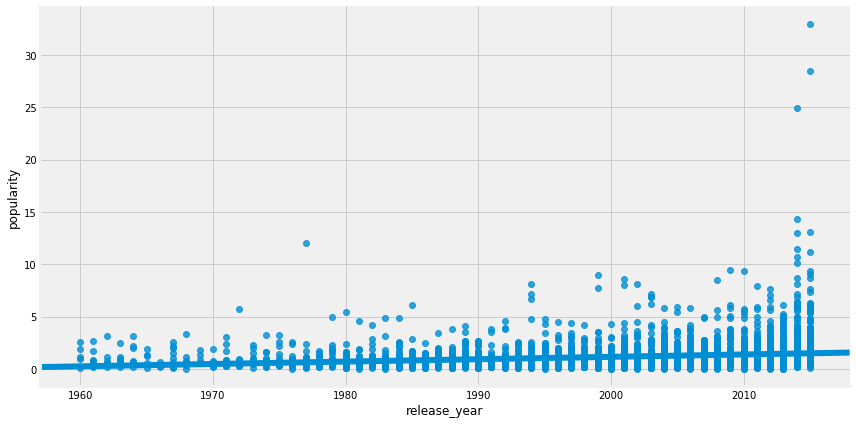

In [135]:
#plot the relation between relase year and popularity
sns.lmplot(x='release_year',y='popularity',data=df,size=6,aspect=2)
plt.show()

### The graph show that the popularity rasing over years

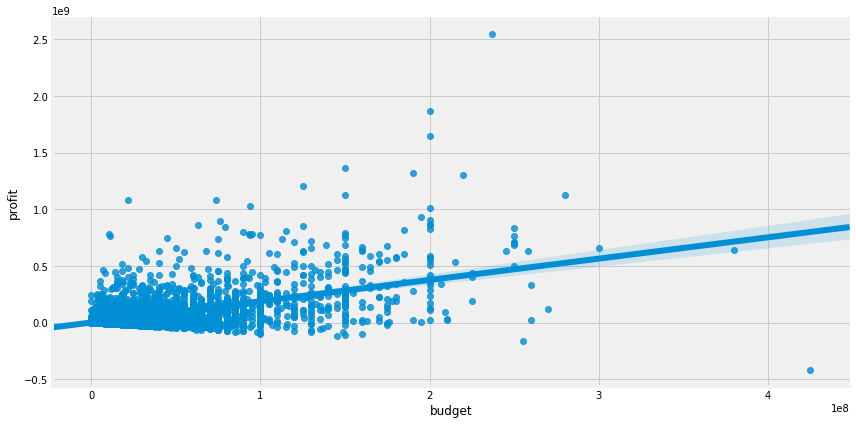

In [134]:
#plot the relation between budget and profit
sns.lmplot(x='budget',y='profit',data=df,size=6,aspect=2)
plt.show()

### The graph show that the profit raising when the budget raising

In [132]:
#identify the best directors
director = df.groupby('director')['profit'].sum().sort_values(ascending=False).head(10)
director

director
Steven Spielberg     7.467064e+09
Peter Jackson        5.197245e+09
James Cameron        5.081995e+09
Michael Bay          3.557208e+09
David Yates          3.379296e+09
Christopher Nolan    3.162549e+09
Chris Columbus       3.116632e+09
George Lucas         2.955997e+09
Robert Zemeckis      2.846691e+09
J.J. Abrams          2.839170e+09
Name: profit, dtype: float64

In [133]:
for i,j in enumerate(director.index):
    print(i,j)

0 Steven Spielberg
1 Peter Jackson
2 James Cameron
3 Michael Bay
4 David Yates
5 Christopher Nolan
6 Chris Columbus
7 George Lucas
8 Robert Zemeckis
9 J.J. Abrams


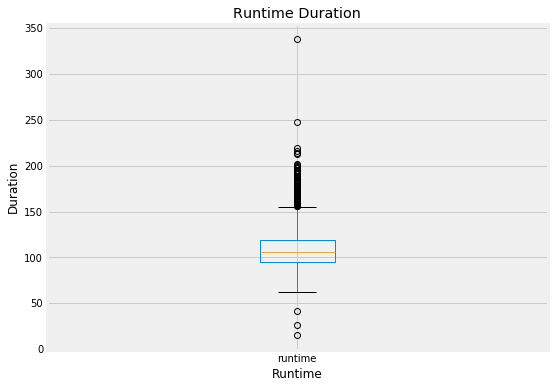

In [129]:
#plot the boxplot for runtime
plt.figure(figsize=(8,6))
df['runtime'].plot('box')
plt.xlabel('Runtime')
plt.ylabel('Duration')
plt.title('Runtime Duration')
plt.show()

In [128]:
#calculate the mean
df['runtime'].mean()

109.21745908028059

In [137]:
budget = df[df['profit'] > 500000000]['budget'].mean()
budget

146061578.94736841

### The mean runtime for movies is 110 min

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [67]:
#create a statiscal summary for the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,3849.0,3.724886e+07,4.221699e+07,1.0,10000000.0,24000000.0,50000000.0,4.250000e+08
revenue,3849.0,1.078148e+08,1.766175e+08,2.0,13670688.0,44907260.0,124305181.0,2.781506e+09
runtime,3849.0,1.092175e+02,1.991414e+01,15.0,95.0,106.0,119.0,3.380000e+02
release_year,3849.0,2.001258e+03,1.128564e+01,1960.0,1995.0,2004.0,2010.0,2.015000e+03
profit,3849.0,7.056595e+07,1.506990e+08,-413912431.0,-1312284.0,20144499.0,81980662.0,2.544506e+09


## Conclusion
after performing all the analysis if we want to make a profitable movie we should use that:
Budget : budget of the movie should be around 

## Limitations
I want to make it clear, it's not 100 percent guaranteed solution that this formula is gonna work, meaning we are going to earn more than \$50M! But it shows us that we have high probability of making high profits if we had similar characteristics as such. All these directors, actors, genres and released dates have a common trend of attraction. If we release a movie with these characteristics, it gives people high expectations from this movie. Thus attracting more people towards the movie but it ultimately comes down to story mainly and also other important influential factors. People having higher expectations gives us less probability of meeting their expectations. Even if the movie was worth, people's high expectations would lead in biased results ultimately effecting the profits. We also see this in real life specially in sequels of movies. This was just one example of an influantial factor that would lead to different results, there are many that have to be taken care of!

And that's my conclusion!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])